In [474]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers


In [477]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [478]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("train_set",
                                                  shuffle=True,
                                                  image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                  batch_size=BATCH_SIZE
                                                  )

Found 344 files belonging to 3 classes.


In [479]:
class_names=dataset.class_names
class_names

['FU-nail-fungus', 'FU-ringworm', 'health']

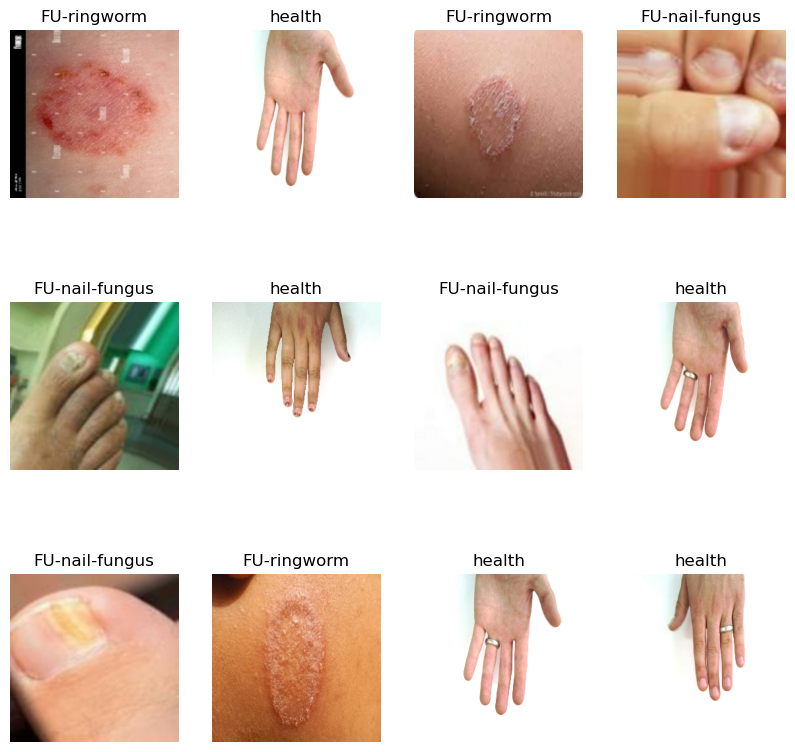

In [480]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
     for i in range(12):
         ax=plt.subplot(3,4,i+1)
         plt.imshow(image_batch[i].numpy().astype("uint8"))
         plt.title(class_names[label_batch[i]])
         plt.axis("off")

In [481]:
train_size= 0.8
len(dataset)*train_size

8.8

In [483]:
train_ds=dataset.take(8)
len(train_ds)


8

In [484]:
test_ds = dataset.skip(8)
len(test_ds)

3

In [485]:
val_size=0.1
len(dataset)*val_size

1.1

In [486]:
val_ds=test_ds.take(2)
len(val_ds)

2

In [487]:
test_ds=test_ds.skip(2)
len(test_ds)

1

In [488]:
def get_dataset_partitions_tf (ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
   ds_size=len(ds)
   if shuffle:
      ds = ds.shuffle(shuffle_size,seed=12)

   train_size = int(train_split*ds_size)
   val_size = int (val_split*ds_size)

   val_ds = ds.skip(train_size).take(val_size)
   test_ds = ds.skip(train_size).skip(val_size)

   return train_ds,val_ds,test_ds

In [489]:
 train_ds, val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [490]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [491]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255),
])

In [492]:
data_augmentation = tf.keras.Sequential([
   layers.RandomFlip("horizontal_and_vertical"),
   layers.RandomRotation(0.3),
])

In [493]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes= 3
model= models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64,(3,3),activation='relu',input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,(3, 3), activation =  'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation= 'relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=input_shape)

In [494]:
model.summary()

Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_71 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_72 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_251 (Conv2D)             │ (32, 254, 254, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_251               │ (32, 127, 127, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_252 (Conv2D)             │ (32, 125, 125, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_252               │ (32, 62, 62, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_253 (Conv2D)             │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_253               │ (32, 30, 30, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_254 (Conv2D)             │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_254               │ (32, 14, 14, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_255 (Conv2D)             │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_255               │ (32, 6, 6, 64)         │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_256 (Conv2D)             │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_256               │ (32, 2, 2, 64)         │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_40 (Flatten)            │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,075 (793.26 KB)

 Trainable params: 203,075 (793.26 KB)

 Non-trainable params: 0 (0.00 B)

In [495]:
from tensorflow.keras.optimizers.legacy import Adam
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [496]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.3707 - loss: 1.0910 - val_accuracy: 0.5938 - val_loss: 0.9382
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3956 - loss: 1.0130 - val_accuracy: 0.5938 - val_loss: 0.9224
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4008 - loss: 0.9815 - val_accuracy: 0.6562 - val_loss: 0.7036
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5367 - loss: 0.7978 - val_accuracy: 0.6875 - val_loss: 0.6856
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6723 - loss: 0.6932 - val_accuracy: 0.9062 - val_loss: 0.4158
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7964 - loss: 0.4619 - val_accuracy: 0.8750 - val_loss: 0.2599
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7902 - loss: 0.4457 - val_accuracy: 0.9062 - val_loss: 0.2628
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7534 - loss: 0.4771 - val_accuracy: 0.9062 - val_loss: 0.2750
Epoch 9/

In [497]:
scores = model.evaluate(test_ds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 433ms/step - accuracy: 0.8750 - loss: 0.2599


In [498]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

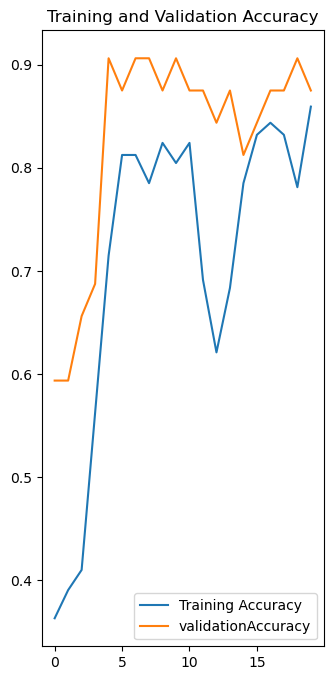

In [499]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='validationAccuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')


first image to predict
first image's actual label :  FU-ringworm
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
predicted label :  health


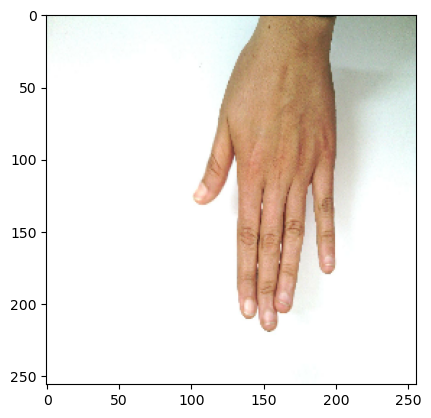

In [500]:
import numpy as np
for image_batch, labels_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label : ",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label : ",class_names[np.argmax(batch_prediction[0])])

In [501]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidance = round(100* (np.max(predictions[0])),2)
    return predicted_class, confidance

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


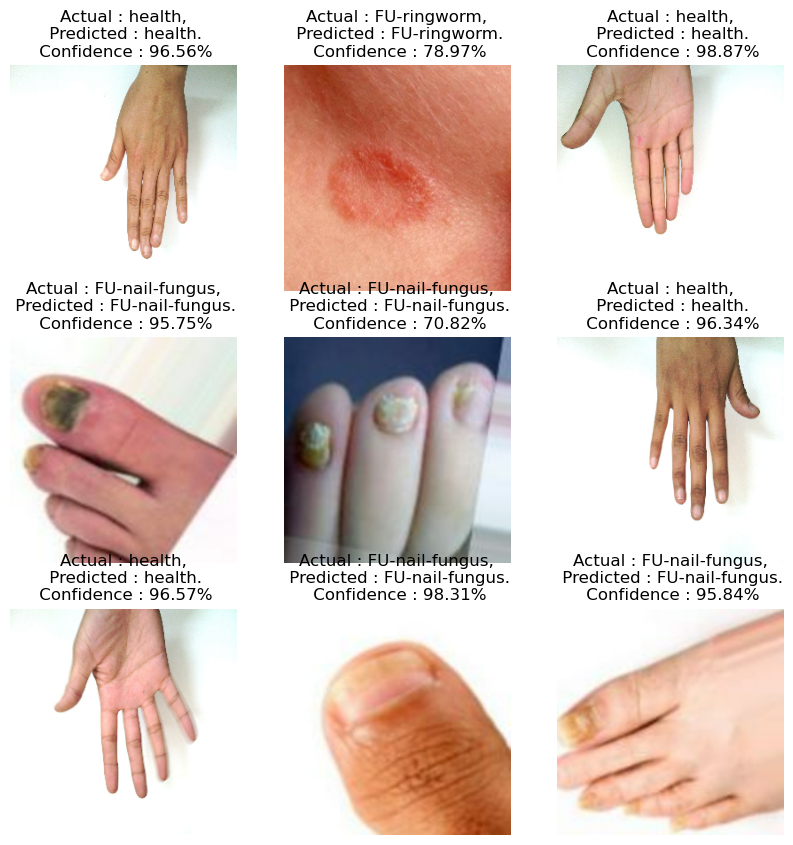

In [502]:
plt.figure(figsize=(10,10))
for images, label in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class,confidance = predict(model, images[i].numpy())
        actual_class = class_names[label[i]]
        plt.title(f"Actual : {actual_class},\n Predicted : {predicted_class}.\n Confidence : {confidance}%")
        plt.axis("off")

In [504]:
model_version=17
model.save(f"./model/{model_version}.keras")

In [507]:
len(model.layers)

17